In [1]:
import pandas as pd

# Load the CSV file
csv_file = 'finalmpmb.csv'
df = pd.read_csv(csv_file)

# Drop all columns except the specified ones
columns_to_keep = ['Week Number', 'Seconds of Week', 'PRN', 'Amplitude']
df = df[columns_to_keep]
#df.to_csv("finalmpmb.csv", sep=',', index=False, encoding='utf-8')


# Print the first few rows
print("Head of the file:")
print(df.head())

# Print the last few rows
print("\nTail of the file:")
print(df.tail())


Head of the file:
   Week Number  Seconds of Week  PRN  Amplitude
0          267    119986.070312   15   0.045261
1          267    119986.078125    5   0.025313
2          267    119986.070312   13   0.044830
3          267    119986.070312   29   0.039758
4          267    119986.078125   20   0.049867

Tail of the file:
        Week Number  Seconds of Week  PRN  Amplitude
826776          267    206388.109375   18   0.024633
826777          267    206388.109375   25   0.065542
826778          267    206388.109375   23   0.046373
826779          267    206388.109375   29   0.077680
826780          267    206388.109375   15   0.043674


In [2]:
from datetime import datetime, timedelta

# Define the GPS epoch
GPS_EPOCH = datetime(1980, 1, 6)

def gps_to_utc(week, seconds):
    # Calculate the GPS time
    gps_time = GPS_EPOCH + timedelta(weeks=week, seconds=seconds)
    return gps_time

# Apply the conversion to the DataFrame
df['UTC Time'] = df.apply(lambda row: gps_to_utc(row['Week Number'], row['Seconds of Week']), axis=1)

# Convert 'UTC Time' to a 24-hour time format
df['24-hour Time'] = df['UTC Time'].dt.strftime('%H:%M:%S')

# Print the first few rows to verify
print("Head of the file with 24-hour time format:")
print(df.head())


Head of the file with 24-hour time format:
   Week Number  Seconds of Week  PRN  Amplitude                   UTC Time  \
0          267    119986.070312   15   0.045261 1985-02-18 09:19:46.070312   
1          267    119986.078125    5   0.025313 1985-02-18 09:19:46.078125   
2          267    119986.070312   13   0.044830 1985-02-18 09:19:46.070312   
3          267    119986.070312   29   0.039758 1985-02-18 09:19:46.070312   
4          267    119986.078125   20   0.049867 1985-02-18 09:19:46.078125   

  24-hour Time  
0     09:19:46  
1     09:19:46  
2     09:19:46  
3     09:19:46  
4     09:19:46  


In [3]:
# Round the "Seconds of Week" column to the nearest integer
#df['Seconds of Week'] = df['Seconds of Week'].round().astype(int)

# Normalize the "Seconds of Week" column by subtracting the first value
#first_seconds = df['Seconds of Week'].iloc[0]
#df['Seconds of Week'] = df['Seconds of Week'] - first_seconds

# Print the first few rows
#print("Head of the file:")
#print(df.head())

# Print the last few rows
#print("\nTail of the file:")
#print(df.tail())

In [4]:
import numpy as np
# Replace zero or very small values of "Amplitude" to avoid log10 issues
#df['Amplitude'] = df['Amplitude'].replace(0, np.nan)
#df['Amplitude'] = df['Amplitude'].fillna(df['Amplitude'].min() / 2)

# Add a new column 'd/u' which is 20log10(Amplitude)
df['d/u'] = -1*20 * np.log10(df['Amplitude'])

# Print the first few rows
print("Head of the file:")
print(df.head())

# Print the last few rows
print("\nTail of the file:")
print(df.tail())


Head of the file:
   Week Number  Seconds of Week  PRN  Amplitude                   UTC Time  \
0          267    119986.070312   15   0.045261 1985-02-18 09:19:46.070312   
1          267    119986.078125    5   0.025313 1985-02-18 09:19:46.078125   
2          267    119986.070312   13   0.044830 1985-02-18 09:19:46.070312   
3          267    119986.070312   29   0.039758 1985-02-18 09:19:46.070312   
4          267    119986.078125   20   0.049867 1985-02-18 09:19:46.078125   

  24-hour Time        d/u  
0     09:19:46  26.885445  
1     09:19:46  31.933180  
2     09:19:46  26.968714  
3     09:19:46  28.011557  
4     09:19:46  26.043728  

Tail of the file:
        Week Number  Seconds of Week  PRN  Amplitude  \
826776          267    206388.109375   18   0.024633   
826777          267    206388.109375   25   0.065542   
826778          267    206388.109375   23   0.046373   
826779          267    206388.109375   29   0.077680   
826780          267    206388.109375   15   0.

/usr/local/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
import plotly.io as pio
pio.renderers.default = "iframe"
# Ask user to input a specific PRN
import plotly.express as px
import plotly.graph_objects as go
# Plot d/u values against 24-hour time for all PRNs together
fig = go.Figure()

# Add traces for each PRN
for prn in df['PRN'].unique():
    group = df[df['PRN'] == prn]
    fig.add_trace(go.Scatter(x=group['24-hour Time'], y=group['d/u'], mode='lines', name=f'PRN {prn}'))

# Update layout
fig.update_layout(
    title='d/u values for all PRNs',
    xaxis_title='Time (24-hour format)',
    yaxis_title='d/u (dB)',
    xaxis_tickformat='%H:%M:%S'
)

# Show the figure
fig.show()


In [6]:
grouped = df.groupby('PRN')

# Print the head and tail of each group
for prn, group in grouped:
    print(f"\nPRN: {prn}")
    print("Head of the group:")
    print(group.head())
    print("\nTail of the group:")
    print(group.tail())


PRN: 1
Head of the group:
    Week Number  Seconds of Week  PRN  Amplitude                   UTC Time  \
8           267    119986.085938    1   0.078593 1985-02-18 09:19:46.085938   
17          267    119987.085938    1   0.078959 1985-02-18 09:19:47.085938   
26          267    119988.085938    1   0.044038 1985-02-18 09:19:48.085938   
35          267    119989.085938    1   0.047473 1985-02-18 09:19:49.085938   
44          267    119990.085938    1   0.042858 1985-02-18 09:19:50.085938   

   24-hour Time        d/u  
8      09:19:46  22.092367  
17     09:19:47  22.051919  
26     09:19:48  27.123466  
35     09:19:49  26.471149  
44     09:19:50  27.359363  

Tail of the group:
       Week Number  Seconds of Week  PRN  Amplitude  \
31127          267    122757.093750    1   0.069335   
31138          267    122758.093750    1   0.130173   
31149          267    122759.093750    1   0.187456   
31170          267    122761.085938    1   0.241624   
31181          267    122762.

Enter a PRN to plot (e.g., 32):  32


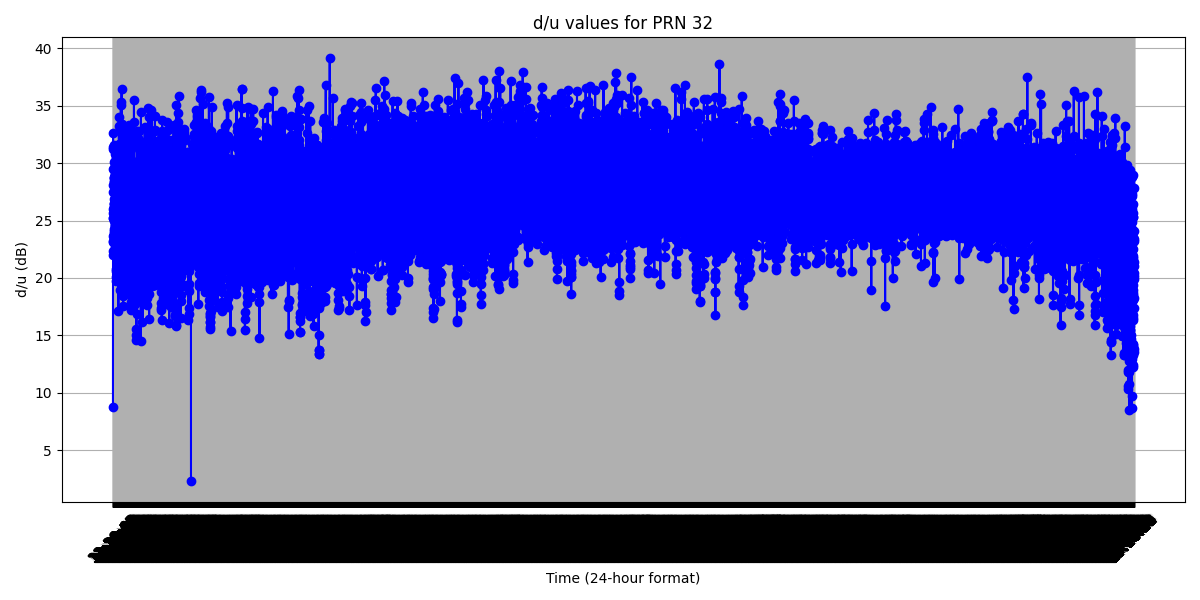

In [15]:
%matplotlib widget
import matplotlib.pyplot as plt

# Ask user to input a specific PRN
specific_prn = int(input("Enter a PRN to plot (e.g., 32): "))

# Plot d/u values against 24-hour time for the specific PRN
if specific_prn in grouped.groups:
    group = grouped.get_group(specific_prn)
    plt.figure(figsize=(12, 6))
    plt.plot(group['24-hour Time'], group['d/u'], marker='o', linestyle='-', color='b')
    plt.title(f'd/u values for PRN {specific_prn}')
    plt.xlabel('Time (24-hour format)')
    plt.ylabel('d/u (dB)')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print(f"PRN {specific_prn} not found in the dataset.")

In [8]:
import plotly.io as pio
pio.renderers.default = "iframe"


In [9]:
# Ask user to input a specific PRN
import plotly.express as px
import plotly.graph_objects as go
specific_prn = int(input("Enter a PRN to plot (e.g., 32): "))

# Plot d/u values against 24-hour time for the specific PRN
if specific_prn in grouped.groups:
    group = grouped.get_group(specific_prn)
    fig = px.line(group, x='24-hour Time', y='d/u', title=f'd/u values for PRN {specific_prn}')
    fig.update_layout(
        xaxis_title='Time (24-hour format)',
        yaxis_title='d/u (dB)',
        xaxis_tickformat='%H:%M:%S'
    )
    fig.show()
else:
    print(f"PRN {specific_prn} not found in the dataset.")


Enter a PRN to plot (e.g., 32):  88


PRN 88 not found in the dataset.


In [14]:
# Count the number of values below 16
count_below_16 = df["d/u"][df["d/u"] < 16].count()

# Calculate the total number of values in the column
total_values = df["d/u"].count()

# Calculate the percentage of values below 16
percentage_below_16 = (count_below_16 / total_values) * 100

# Count the number of values below 20
count_below_20= df["d/u"][df["d/u"] < 20].count()

# Calculate the total number of values in the column
total_values = df["d/u"].count()

# Calculate the percentage of values below 16
percentage_below_20 = (count_below_20 / total_values) * 100

# Count the number of values >= 20
count_eqgt_20= df["d/u"][df["d/u"] >= 20].count()

# Calculate the total number of values in the column
total_values = df["d/u"].count()

# Calculate the percentage of values below 16
percentage_eqgt_20 = (count_eqgt_20 / total_values) * 100
print(f"Percentage of d/u values below 16: {percentage_below_16:.2f}%")
print(f"Percentage of d/u values below 20: {percentage_below_20:.2f}%")
print(f"Percentage of d/u values >= 20: {percentage_eqgt_20:.2f}%")




Percentage of d/u values below 16: 0.48%
Percentage of d/u values below 20: 3.92%
Percentage of d/u values >= 20: 96.08%
